1) SLR uses only one predictor variable for an outcome variable while MLR uses more than more predictor variable to predict an outcome variable. This means that MLR can have more complex relationships with the predictor and outcome variables


A continous data looks at the average change ie for each one unit increase while indicator variables only look at categorical data

The SLR model will have one line while introducing an indictor variable will add a second parallel line with the same slope however have a different intercept.

The affect of adding an interaction between a continous and indicator variable is that we will receive two different lines with different slopes and intercepts.

This will result in multiple parallel lines that will model a different category of of the categorical variable

2) The predictor varaibles for this would be the budgets for the tv ads and the online ads. We can make two different models for this the first being that the tv and online ads are independent of each other for spending and the other being that they have an interaction with each other. The first would represent when spending a goes up sales would boost by x amount and the second model would show the interaction when one ad spending goes up.

We can add a binary variable to represent high and low spending for each ad campaign.

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11426    0.0
11427    0.0
11428    0.0
11429    0.0
11430    0.0
Name: DEMO_identity_indigenous, Length: 9599, dtype: float64
DEMO_identity_indigenous
0.0    9599
Name: count, dtype: int64
0
                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Thu, 14 Nov 2024   Prob (F-statistic):                nan
Time:                                22:28:37   Log-Likelihood:                -21746.
No. Observations:                        9599   AIC:                         4.349e+04
Df Residuals:                            9598   BIC:                         4.350e+04
Df Model:                          

/opt/conda/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


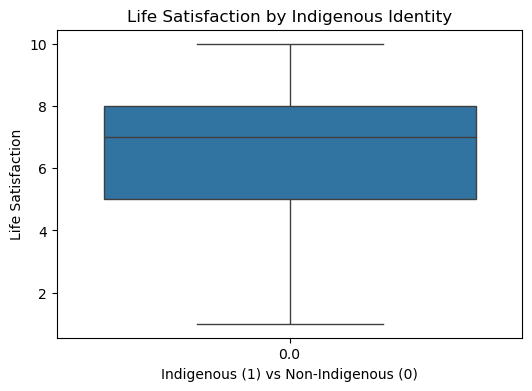

In [28]:
#3)
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the 'DEMO_identity_indigenous' column
df_cleaned['DEMO_identity_indigenous'] = df_cleaned['DEMO_identity_indigenous'].replace({
    'Indigenous peoples (e.g., First Nations, Métis, Inuit)': 1,  # Map Indigenous peoples to 1
    'Not Selected': 0,                                            # Map Not Selected to 0
    np.nan: 0                                                     # Replace NaN with 0 (Non-Indigenous)
})

# Check the unique values after cleaning
print(df_cleaned['DEMO_identity_indigenous'])

# Check if the 'DEMO_identity_indigenous' column is correctly mapped
print(df_cleaned['DEMO_identity_indigenous'].value_counts())

# Check if there are any missing values in 'WELLNESS_life_satisfaction'
print(df_cleaned['WELLNESS_life_satisfaction'].isnull().sum())

# Remove rows with missing values in either 'DEMO_identity_indigenous' or 'WELLNESS_life_satisfaction'
df_cleaned = df_cleaned.dropna(subset=['DEMO_identity_indigenous', 'WELLNESS_life_satisfaction'])

# Fit the multiple linear regression model
formula = "WELLNESS_life_satisfaction ~ DEMO_identity_indigenous"  # This assumes 'DEMO_identity_indigenous' is binary (1 for Indigenous, 0 for non-Indigenous)
model = smf.ols(formula, data=df_cleaned).fit()

# Print the summary of the model
print(model.summary())

# Plot using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='DEMO_identity_indigenous', y='WELLNESS_life_satisfaction', data=df_cleaned)
plt.title('Life Satisfaction by Indigenous Identity')
plt.xlabel('Indigenous (1) vs Non-Indigenous (0)')
plt.ylabel('Life Satisfaction')
plt.show()



ChatGPT summary for q3 
https://chatgpt.com/share/673679e8-d668-8002-bae0-4dceb5109fc1
    

Data Cleaning and Regression Analysis
Cleaning the 'DEMO_identity_indigenous' Column:

The DEMO_identity_indigenous column had values like 'Indigenous peoples (e.g., First Nations, Métis, Inuit)', 'Not Selected', and NaN. We replaced:
'Indigenous peoples (e.g., First Nations, Métis, Inuit)' with 1 (Indigenous).
'Not Selected' with 0 (Non-Indigenous).
NaN with 0 (Non-Indigenous).
This ensures the variable is binary (1 for Indigenous, 0 for Non-Indigenous).
Modeling with Linear Regression:

We attempted to fit a multiple linear regression model using WELLNESS_life_satisfaction as the dependent variable and DEMO_identity_indigenous as the independent variable.
The regression formula used was:
WELLNESS_life_satisfaction ~ DEMO_identity_indigenous.
The model was fitted using statsmodels' OLS regression.
Addressing Missing Data:

We checked for missing values in both the DEMO_identity_indigenous and WELLNESS_life_satisfaction columns.
Rows with missing values in either of these variables were dropped before fitting the model.
Plotting the Results:

We visualized the relationship between DEMO_identity_indigenous and WELLNESS_life_satisfaction using a scatter plot with a regression line.
Issues and Fixes:
Formula Issue: Initially, we used the wrong dataset (df instead of df_cleaned) in the regression model.
Handling Missing Values: We ensured that missing values were handled by dropping rows with missing data before fitting the model.
Final Code:
The final code uses the cleaned dataset (df_cleaned) and drops any rows with missing values in the relevant columns before fitting the regression model and visualizing the results.

Let me know if you'd like further details or assistance!


4) These two statements show different aspects of the model. The individual predictors can be sigificant but there could be a small sample size failing to represent the full data. Also, it could be possible that you could be missing important variables which would lead to more varriability in the data.

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        03:59:40   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#5)
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738
'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


This code makes two different models, model 3 and model 4. Model three is a simple linear model with only two predictors while model four looks at more predictors and their interaction terms. The in sample r^2 explains the varaince in training data while the out of sample r^2 relates to how well the models generalize to new data

In [8]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


6) The model combines all the different interaction terms to make a matrix of possible combinations, as it is a matrix there is overlap. The overlap or multicollinearity is represented by a condition number and the higher this number is the more overlap there is reducing the models ability to generalize to new data. To reduce the condition number, we center and scale the model to reduce the interactions.

In [9]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


7) As these models go from 3-7 they remove unnecessary predictors and limit interactions to reduce multicollinearity. To start model three only looks at HP using attack and defense as a predictor. Model 4 adds more predictors speed, legendary, sp def, sp atk and the interaction terms between them this has high multicollinearity. Model 5 reduce interactions and adds categorical variables. Model 6 changes the predictors from model 5 as significant predictors and the rest as binary indictors. Model 7 adds back limited interaction terms between key predictors.

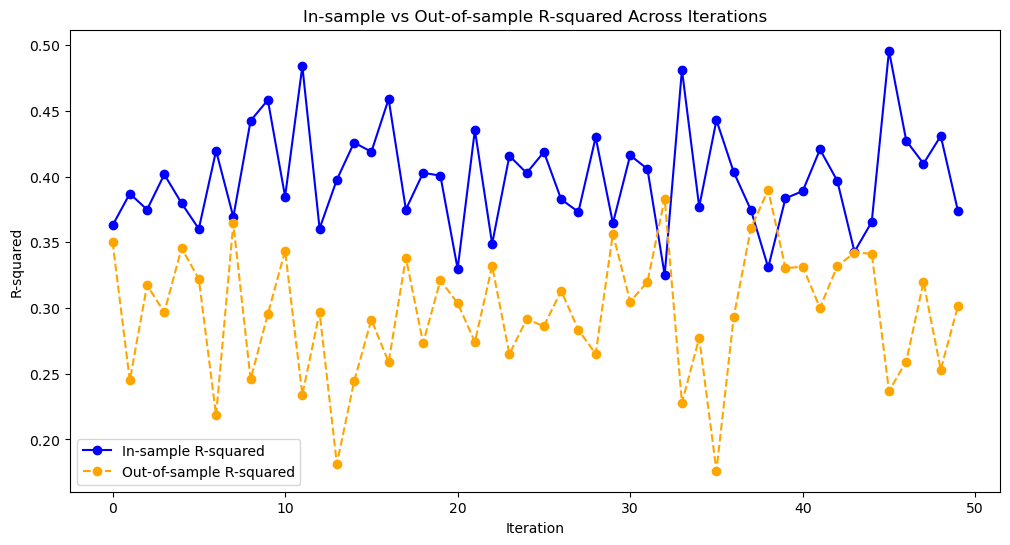

In [10]:
#8)
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set number of iterations for repeated model evaluations
num_iterations = 50

# Lists to collect "in-sample" and "out-of-sample" R-squared values
in_sample_r2s = []
out_of_sample_r2s = []

# Loop to repeatedly split data, fit the model, and calculate metrics
for _ in range(num_iterations):
    # Randomly split the data without setting a seed for each iteration
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Define and fit the model (using model7 as the example)
    model = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
    model_fit = model.fit()
    
    # Calculate "in-sample" R-squared
    in_sample_r2 = model_fit.rsquared
    in_sample_r2s.append(in_sample_r2)
    
    # Predict on test set and calculate "out-of-sample" R-squared
    yhat = model_fit.predict(pokeaman_test)
    y = pokeaman_test['HP']
    out_of_sample_r2 = np.corrcoef(y, yhat)[0, 1] ** 2
    out_of_sample_r2s.append(out_of_sample_r2)

# Plotting the "in-sample" and "out-of-sample" R-squared values
plt.figure(figsize=(12, 6))
plt.plot(in_sample_r2s, label="In-sample R-squared", marker='o', linestyle='-', color='blue')
plt.plot(out_of_sample_r2s, label="Out-of-sample R-squared", marker='o', linestyle='--', color='orange')
plt.xlabel("Iteration")
plt.ylabel("R-squared")
plt.title("In-sample vs Out-of-sample R-squared Across Iterations")
plt.legend()
plt.show()


In [11]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)
'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.00038866891913977205 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.00038866891913977205 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.262626901

This code is showing the stability of the model and sees how restrcting the training to specific generations affects the model. By restricting the training we can see if more diverse generational data will improve future prediction and reduces overfitting to generation-specific patterns 

Summary:
https://chatgpt.com/share/6736cf57-5d2c-8002-8cb7-088b5856fbc2

This chat focused on analyzing the predictive stability and generalizability of two regression models (model6 and model7) for Pokémon HP. We discussed how training these models on different subsets of Pokémon generations (e.g., only Generation 1, or Generations 1 to 5) affects their performance on new or "future" generations. By examining both in-sample and out-of-sample values, we assessed each model's fit quality on the training generation(s) and their generalization to different, unseen generations.

Key takeaways:

Generational Training Differences: Training on a single generation (e.g., Generation 1) tends to reduce generalizability to future generations, as shown by a drop in out-of-sample 

Broader Training Data: Including multiple generations (e.g., Generations 1 to 5) generally improves out-of-sample performance, indicating that models are less prone to overfitting and better capture cross-generational trends.
The purpose of these tests is to understand how varying the scope of training data affects predictive stability and robustness across generations.